Simple code testing out different support vector machines.
Here we create a bunch of support vector machines with different values for C and different error measures. By then employing cross validation, we hope to determine which values of C and error measure is ideal for this SVM and
data set

In [36]:
# Imports
import pickle
from cross_validate import CrossValidation
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data
x_train = pickle.load(open("x_train.p", "rb"))
y_train = pickle.load(open("y_train.p", "rb"))

In [3]:
# Fits a SVM with the attributes of C and loss
# Uses x_data and y_data to fit the SVM
# Employs k_fold_cross_validation to determine the test error
# The average accuracy of the SVMs with k_fold_cross_validation is returned
def run_SVM(x_data, y_data, k_fold_cross_validation, C, loss):
    print("Running SVM with " + str(k_fold_cross_validation) + " fold cross validation.")
    print("Using C = " + str(C) + " and loss = " + str(loss))
    
    cross_validated_data = CrossValidation(x_data, y_data, k_fold_cross_validation)
    
    accuracies = []
    
    for i in range(k_fold_cross_validation):
        x_train, y_train = cross_validated_data.get_other_partitions(i)
        x_test, y_test = cross_validated_data.get_partition(i)
        
        svc = LinearSVC(C = C, loss = loss)
        svc.fit(x_train, y_train)
        accuracies.append(svc.score(x_test, y_test))
        
    average_accuracy = np.mean(accuracies)
    print("Average accuracy was " + str(average_accuracy))
    return average_accuracy

In [4]:
# Fit the various models

# Generate the different C values to use
c_list = np.logspace(-6, 2, 9)

squared_hinge_scores = []
best_squared_hinge = -1
best_squared_hinge_score = 0

hinge_scores = []
best_hinge = -1
best_hinge_score = 0

for c in c_list:
    score = run_SVM(x_train, y_train, 10, c, "squared_hinge")
    print("")
    squared_hinge_scores.append(score)
    
    if (score > best_squared_hinge_score):
        best_squared_hinge_score = score
        best_squared_hinge = c
        
for c in c_list:
    score = run_SVM(x_train, y_train, 10, c, "hinge")
    print("")
    hinge_scores.append(score)
    
    if (score > best_hinge_score):
        best_hinge_score = score
        best_hinge = c

Running SVM with 10 fold cross validation.
Using C = 1e-06 and loss = squared_hinge
Average accuracy was 0.70805

Running SVM with 10 fold cross validation.
Using C = 1e-05 and loss = squared_hinge
Average accuracy was 0.75915

Running SVM with 10 fold cross validation.
Using C = 0.0001 and loss = squared_hinge
Average accuracy was 0.80845

Running SVM with 10 fold cross validation.
Using C = 0.001 and loss = squared_hinge
Average accuracy was 0.84305

Running SVM with 10 fold cross validation.
Using C = 0.01 and loss = squared_hinge
Average accuracy was 0.84915

Running SVM with 10 fold cross validation.
Using C = 0.1 and loss = squared_hinge
Average accuracy was 0.8461

Running SVM with 10 fold cross validation.
Using C = 1.0 and loss = squared_hinge
Average accuracy was 0.84565

Running SVM with 10 fold cross validation.
Using C = 10.0 and loss = squared_hinge
Average accuracy was 0.8384

Running SVM with 10 fold cross validation.
Using C = 100.0 and loss = squared_hinge
Average acc

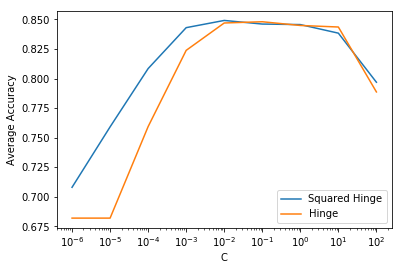

Best C value for hinge was: 0.1. The error for that was 0.84805
Best C value for squared hinge was: 0.01. The error for that was 0.84915


In [5]:
plt.plot(c_list, squared_hinge_scores, label = "Squared Hinge")
plt.plot(c_list, hinge_scores, label = "Hinge")
plt.xlabel("C")
plt.ylabel("Average Accuracy")
plt.xscale("log")
plt.legend()
plt.show()

print("Best C value for hinge was: " + str(best_hinge) + \
      ". The error for that was " + str(best_hinge_score))
print("Best C value for squared hinge was: " + str(best_squared_hinge) + \
      ". The error for that was " + str(best_squared_hinge_score))

In [7]:
# Import test data
x_test = pickle.load(open("x_test.p", "rb"))

In [44]:
# Start fitting to test data. Output file inside of basic_svm.txt

# The best SVM had a C value of 0.01 and a squared hinge loss function, so let's use that.
svc = LinearSVC(C = 0.01, loss = "squared_hinge")
svc.fit(x_train, y_train)

predictions = svc.predict(x_test)
ids = range(1, len(predictions) + 1)

output = []
for i in range(len(ids)):
    output.append([ids[i], int(predictions[i])])

# Output the submission file
np.savetxt(open("basic_svm.txt", "wb"), output, delimiter = ",", newline = "\n", fmt = "%i", \
           header = "Id,Prediction", comments = "")